In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure

In [23]:
turbine = pd.read_csv('T1.csv')
del turbine['Wind Direction (°)']
display(turbine)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,01 01 2018 00:00,380.047791,5.311336,416.328908
1,01 01 2018 00:10,453.769196,5.672167,519.917511
2,01 01 2018 00:20,306.376587,5.216037,390.900016
3,01 01 2018 00:30,419.645905,5.659674,516.127569
4,01 01 2018 00:40,380.650696,5.577941,491.702972
...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503


<Axes: xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

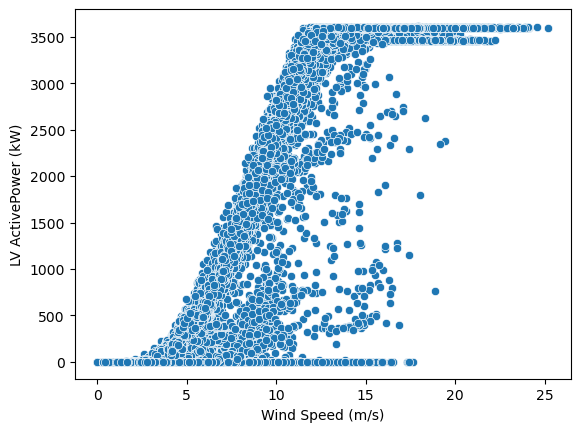

In [25]:
sns.scatterplot(data=turbine, x='Wind Speed (m/s)', y='LV ActivePower (kW)')

<Axes: xlabel='Wind Speed (m/s)', ylabel='Theoretical_Power_Curve (KWh)'>

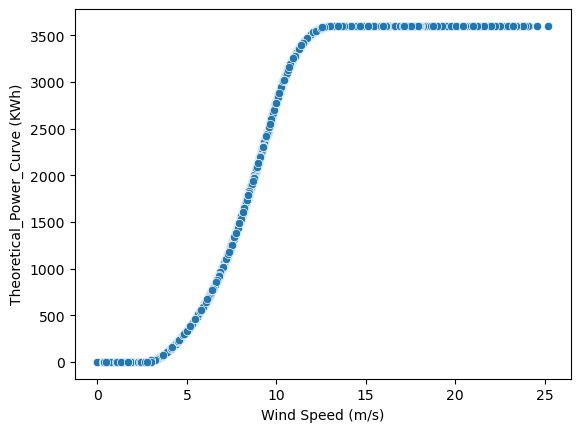

In [27]:
sns.scatterplot(data=turbine, x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)')

In [82]:
print(totpower_real[0:15])

[380.047790527343, 453.76919555664, 306.376586914062, 419.645904541015, 380.650695800781, 402.391998291015, 447.605712890625, 387.2421875, 463.651214599609, 439.725708007812, 498.181701660156, 526.816223144531, 710.587280273437, 655.194274902343, 754.762512207031]


In [86]:
totpower_real = turbine['LV ActivePower (kW)'].tolist()
totpower_theorical = turbine['Theoretical_Power_Curve (KWh)'].tolist()
max_power = []
min_power = []
boundary = []

for power in totpower_theorical:
    max_power.append(power*1.05)
    min_power.append(power*0.95)

for p, power in enumerate(totpower_real):
    if power>=min_power[p] and power<=max_power[p]:
        boundary.append('Inside')
    elif power == 0:
        boundary.append('Zero')
    else:
        boundary.append('Outside')

print(boundary.count('Inside')/len(boundary))

0.37286760340391845


In [90]:
turbine['InsideLimit'] = boundary
display(turbine)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),boundary,DentroLimite,InsideLimit
0,01 01 2018 00:00,380.047791,5.311336,416.328908,inside the boundary,Fora,Outside
1,01 01 2018 00:10,453.769196,5.672167,519.917511,inside the boundary,Fora,Outside
2,01 01 2018 00:20,306.376587,5.216037,390.900016,inside the boundary,Fora,Outside
3,01 01 2018 00:30,419.645905,5.659674,516.127569,inside the boundary,Fora,Outside
4,01 01 2018 00:40,380.650696,5.577941,491.702972,inside the boundary,Fora,Outside
...,...,...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,inside the boundary,Fora,Outside
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,inside the boundary,Fora,Outside
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,inside the boundary,Fora,Outside
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,inside the boundary,Dentro,Inside


<Axes: xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

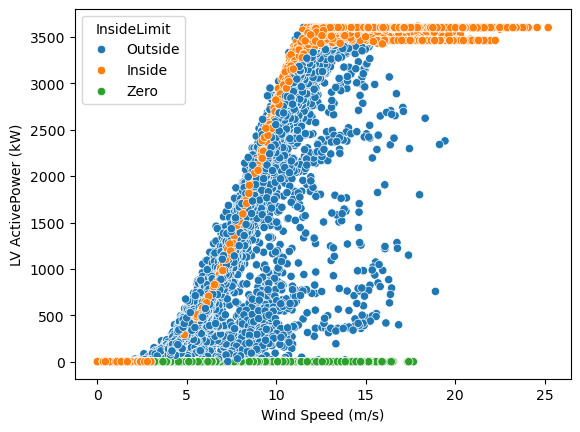

In [94]:
sns.scatterplot(data=turbine, x='Wind Speed (m/s)', y='LV ActivePower (kW)', hue='InsideLimit')